In [11]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, kruskal

# Load your data
df = pd.read_csv('../data/processed/preprocessed.csv')

# Create KPI columns
df['Margin'] = df['TotalPremium'] - df['TotalClaims']
df['HadClaim'] = df['TotalClaims'] > 0


In [ ]:
# Hypothesis 1: Risk Differences Across Provinces
# Select top 3 provinces for sufficient sample size
top_provinces = df['Province'].value_counts().nlargest(3).index
df_subset = df[df['Province'].isin(top_provinces)]

# Group HadClaim by Province
groups = [df_subset[df_subset['Province'] == p]['HadClaim'] for p in top_provinces]

# ANOVA test
stat, p_val = f_oneway(*groups)
print(f"ANOVA (Claim Frequency by Province): F-stat={stat:.4f}, p={p_val:.4f}")


ANOVA (Claim Frequency by Province): F-stat=29.0864, p=0.0000


In [22]:
# Hypothesis 2: Risk Differences Between Zip Codes
# Get top 2 zip codes by count
top_zips = df['PostalCode'].value_counts().nlargest(2).index

# Filter by top 2 zips
group_A = df[df['PostalCode'] == top_zips[0]]['HadClaim'].astype(int)
group_B = df[df['PostalCode'] == top_zips[1]]['HadClaim'].astype(int)

# T-test
t_stat, p_val = ttest_ind(group_A, group_B, equal_var=False)
print(f"T-test (Claim Frequency by Zip): T-stat={t_stat:.4f}, p={p_val:.4f}")

T-test (Claim Frequency by Zip): T-stat=-1.8696, p=0.0615


In [ ]:
# Hypothesis 3: Margin Difference Between Zip Codes
t_stat, p_val = ttest_ind(group_A['Margin'], group_B['Margin'], equal_var=False)
print(f"T-test (Margin by Zip): T-stat={t_stat:.4f}, p={p_val:.4f}")


T-test (Margin by Zip): T-stat=1.1639, p=0.2445


In [23]:
# Hypothesis 4: Gender-Based Risk Differences
df['HadClaim'] = df['HadClaim'].astype(int)

group_m = df[df['Gender'] == 'Male']['HadClaim']
group_f = df[df['Gender'] == 'Female']['HadClaim']

t_stat, p_val = ttest_ind(group_m, group_f, equal_var=False)
print(f"T-test (Claim Frequency by Gender): T-stat={t_stat:.4f}, p={p_val:.4f}")

T-test (Claim Frequency by Gender): T-stat=0.2055, p=0.8372


## ✅ Business Recommendations Based on Hypothesis Testing

| **Hypothesis** | **Test** | **Test Statistic** | **p-value** | **Conclusion** | **Business Insight** |
|----------------|----------|--------------------|-------------|----------------|------------------------|
| H₀: No risk differences across provinces | ANOVA | F=29.0864 | 0.0000 | ❌ Reject H₀ (Significant difference) | Provinces differ significantly in claim frequency. Pricing or underwriting rules should reflect this. |
| H₀: No risk differences between top 2 zip codes | t-test | T=-1.8696 | 0.0615 | ✅ Fail to reject H₀ (Not significant at 0.05) | Risk differences between the top two zip codes are not statistically significant. |
| H₀: No margin differences between top 2 zip codes | t-test | T=1.1639 | 0.2445 | ✅ Fail to reject H₀ | Profit margins between top zip codes are statistically similar. No adjustments needed. |
| H₀: No risk difference between Women and Men | t-test | T=0.2055 | 0.8372 | ✅ Fail to reject H₀ | Gender does not significantly affect claim frequency. Gender-based pricing is not justified. |


## 📌 Business Summary

1. **Provinces show strong variation in risk (p < 0.01)**  
   → Consider **geographic segmentation** in pricing strategies. For example, if Gauteng has higher claim frequency, raise premiums accordingly.

2. **No statistically significant differences by ZipCode**  
   → Fine-grained geographic segmentation by postal code may not be necessary.

3. **No margin difference between zip codes**  
   → Margins are stable across top locations, so there's no need for profitability-based location targeting at the zip code level.

4. **Gender has no meaningful effect on risk**  
   → Using gender as a risk driver would not be statistically supported or ethically preferable.


/tmp/ipykernel_13611/101438583.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Province', y='HadClaim', estimator=lambda x: sum(x)/len(x), ci=None)


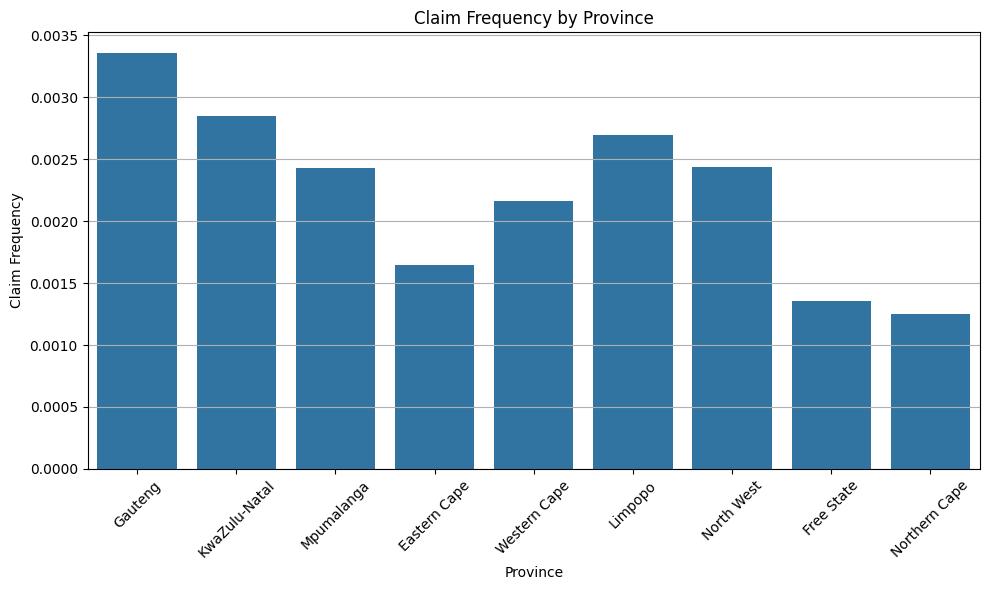

In [30]:
# Claim Frequency by Province
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Province', y='HadClaim', estimator=lambda x: sum(x)/len(x), ci=None)
plt.title('Claim Frequency by Province')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


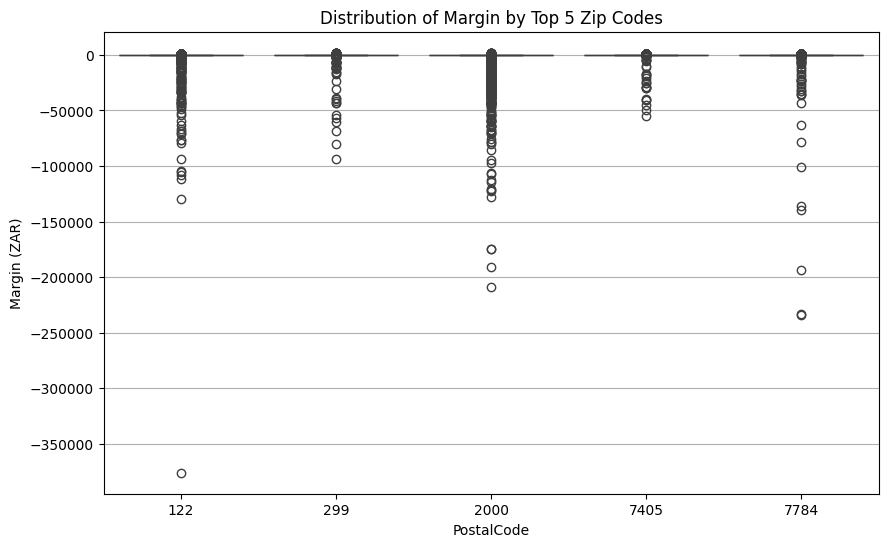

In [31]:
# Boxplot of Margin by Zip Code (Top 5)
top_zips = df['PostalCode'].value_counts().nlargest(5).index
subset = df[df['PostalCode'].isin(top_zips)]

plt.figure(figsize=(10,6))
sns.boxplot(data=subset, x='PostalCode', y='Margin')
plt.title('Distribution of Margin by Top 5 Zip Codes')
plt.ylabel('Margin (ZAR)')
plt.grid(axis='y')
plt.show()

/tmp/ipykernel_13611/585493479.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Gender', y='HadClaim', estimator=lambda x: sum(x)/len(x), ci=None)


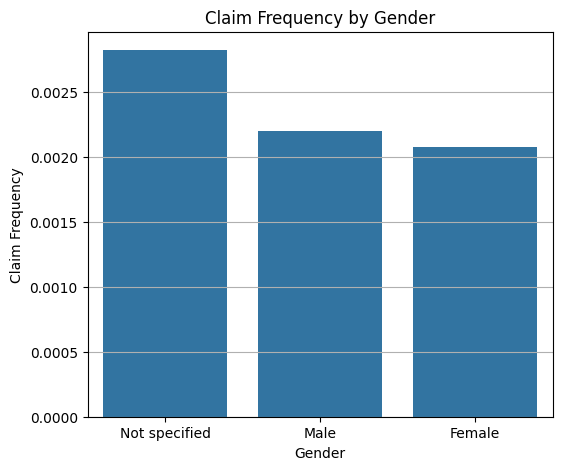

In [29]:
# Claim Frequency by Gender
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Gender', y='HadClaim', estimator=lambda x: sum(x)/len(x), ci=None)
plt.title('Claim Frequency by Gender')
plt.ylabel('Claim Frequency')
plt.grid(axis='y')
plt.show()
